# ONDAS GRAVITACIONAIS

Gravitational waves are 'ripples' in the fabric of space-time caused by some of the most violent and energetic processes in the Universe. Albert Einstein predicted the existence of gravitational waves in 1916 in his general theory of relativity. Einstein's mathematics showed that massive accelerating objects (such as neutron stars or black holes orbiting each other) would disrupt space-time in such a way that 'waves' of distorted space would radiate from the source (like the movement of waves away from a stone thrown into a pond). Furthermore, these ripples would travel at the speed of light through the Universe, carrying with them information about their cataclysmic origins, as well as invaluable clues to the nature of gravity itself.

The strongest gravitational waves are produced by catastrophic events such as colliding black holes, the collapse of stellar cores (supernovae), coalescing neutron stars or white dwarf stars, the slightly wobbly rotation of neutron stars that are not perfect spheres, and the remnants of gravitational radiation created by the birth of the Universe itself.

# OBSERVATÓRIO LIGO


The Laser Interferometer Gravitational-Wave Observatory (LIGO) is designed to open the field of gravitational-wave astrophysics through the direct detection of gravitational waves predicted by Einstein’s General Theory of Relativity. LIGO’s multi-kilometer-scale gravitational wave detectors use laser interferometry to measure the minute ripples in space-time caused by passing gravitational waves from cataclysmic cosmic sources such as the mergers of pairs of neutron stars or black holes, or by supernovae. LIGO consists of two widely separated interferometers within the United States—one in Hanford, Washington and the other in Livingston, Louisiana—operated in unison to detect gravitational waves.

# BLIND INJECTION

 The LIGO Scientific Collaboration and the Virgo Collaboration conducted their latest joint observation run (using the LIGO Hanford, LIGO Livingston, Virgo and GEO 600 detectors) from July, 2009 through October 2010, and are jointly searching through the resulting data for gravitational wave signals standing above the detector noise levels. To make sure they get it right, they train and test their search procedures with many simulated signals that are injected into the detectors, or directly into the data streams. The data analysts agreed in advance to a "blind" test: a few carefully-selected members of the collaborations would secretly inject some (zero, one, or maybe more) signals into the data without telling anyone. The secret goes into a "Blind Injection Envelope", to be opened when the searches are complete. Such a "mock data challenge" has the potential to stress-test the full procedure and uncover problems that could not be found in other ways. - See more at: http://www.ligo.org/news/blind-injection.php#sthash.ogeTXrDt.dpuf

# DESCRIÇÃO DO EXERCÍCIO

A partir dos dados de ruído do LIGO e de um sinal 'falso' inserido pela técnica de Blind Injection, a ideia do exercício é analisar a série temporal, aplicando a transformada de Fourier e verificando como a densidade espectral melhora a visualização e a extração de informações acerca da intensidade e frequência. Assim, a ideia principal consiste e encontrar a frequencia em que ocorre a 'falsa' detecção de onda gravitacional.

A tranformada é aplicada modificando a análise temporal pela análise de frequências. Ainda, poderia ser utilizada a transformada inversa caso quiséssemos filtrar  a função no espectro de frequências e voltar a analisar a série temporal assim como se é feito no estudo de sinais.

Neste exercício utilizamos apenas os dados do LIGO que se encontra em Hanford - EUA.

# CARREGAMENTO DE DADOS

In [1]:
# Bibliotecas de Python importadas 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import minha_lib  # contém a função que realiza transformadas de Fourier
%matplotlib inline

In [2]:
ligo_y = np.load('LIGO_large.npy')  # Dados para análise do ruído
fake_ligo = pd.read_csv('HLV-strain.txt',skiprows=1,sep = '\s+',engine='python')  # Dados de Blind Injection

In [3]:
fake_ligo.head()

,deltaTime,Hanford,Livingston,Virgo
0,0.000000,1.263298e-17,-2.839599e-17,-1.573452e-19
1,0.000061,1.268468e-17,-2.894368e-17,-1.854928e-19
2,0.000122,1.191874e-17,-2.767487e-17,2.515395e-21
3,0.000183,1.230309e-17,-2.852852e-17,-2.544255e-19
4,0.000244,1.137184e-17,-2.723858e-17,-1.962309e-19


# SÉRIE TEMPORAL DO RUÍDO

In [4]:
# tempo truncado para 2 segundos

taxa_amostragem = 4096 # contagens por segundo fornecidas pelo site do LIGO
passo = 1/taxa_amostragem
T = 10
ligo_t = np.arange(0,T,passo)

In [5]:
#truncando ligo_y para ser compativel com ligo_t
#Primeiros 646 pontos nao eram bem representativos do ruído

ligo_y = ligo_y[646:T*taxa_amostragem + 646]

## PLOTANDO

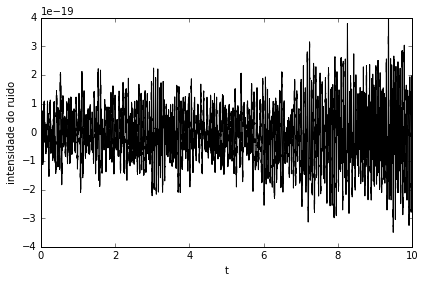

In [6]:
plt.plot(ligo_t,ligo_y,c='black')
plt.ylabel('intensidade do ruido')
plt.xlabel('t')


plt.tight_layout()

# SÉRIE TEMPORAL DE HANFORD

In [7]:
fake_ligo.columns

Index(['deltaTime', 'Hanford', 'Livingston', 'Virgo'], dtype='object')

In [8]:
# Redefinição dos nomes de colunas de interesse para facilitar manipulação do código

t = fake_ligo['deltaTime']
y = fake_ligo['Hanford']

## PLOTANDO

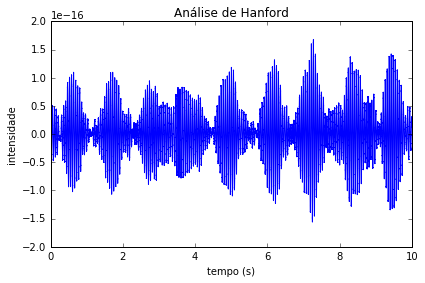

In [9]:
plt.title('Análise de Hanford')
plt.ylabel('intensidade')
plt.xlabel('tempo (s)')
_ = plt.plot(t,y)

plt.tight_layout()

# TRANSFORMADA DE FOURIER - RUÍDO - LIGO (Hanford)

In [10]:
# Frequencia e intensidade depois de aplicada a tranformada de Fourier
freqruido, intensidaderuido = minha_lib.trans_fourier(ligo_t,ligo_y)

# TRANSFORMADA DE FOURIER - BLIND INJECTION - LIGO (Hanford)

In [11]:
# Frequencia e intensidade depois de aplicada a tranformada de Fourier
freq,intensidade = minha_lib.trans_fourier(t,y)

## PLOTANDO - RUIDO E BLIND INJECTION SOBREPOSTOS

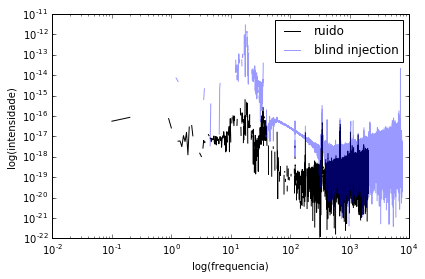

In [12]:
plt.loglog(freqruido,intensidaderuido,c = 'black',label = 'ruido')
plt.xlabel('log(frequencia)')
#plt.xlim(-250,2250)
plt.ylabel('log(intensidade)')

plt.loglog(freq,intensidade,label = 'blind injection',alpha = 0.4)
#plt.xlim(-1000,8.5e3)
plt.legend()

plt.tight_layout()

# DENSIDADE ESPECTRAL 

A equação da PSD é: 

$PSD = |H(f)|^2 + |H(-f)|^2$

sendo |H(f)| a transformada de fourier da série temporal

# DENSIDADE ESPECTRAL - RUIDO

In [13]:
# Calculo da densidade espectral - Ruido
psd_ruido = 2*abs(intensidaderuido)**2

# DENSIDADE ESPECTRAL - BLIND INJECTION

In [14]:
# Calculo da densidade espectral - Blind Injection
psd = 2*abs(intensidade)**2

## PLOTANDO - RUIDO E BLIND INJECTION SOBREPOSTOS

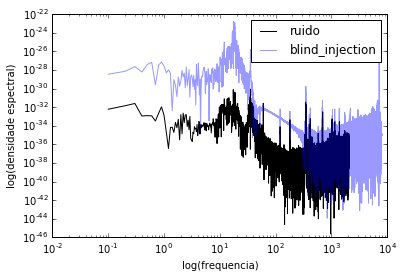

In [15]:
plt.loglog(freqruido,psd_ruido,c = 'black',label = 'ruido')

plt.loglog(freq,psd,label = 'blind_injection',alpha = 0.4)
plt.xlabel('log(frequencia)')
_ = plt.ylabel('log(densidade espectral)')
plt.legend()


In [16]:
# O pico representa o sinal falso. Para calcula-lo:

log_pico_freq = freq[np.argmax(psd)]

freq_pico = 10**(log_pico_freq)
print('A Frequência do Pico calculada é:', freq_pico,'Hz')
print('O tempo do Pico calculado é:', 1/freq_pico,'s')

A Frequência do Pico calculada é: 3.96828974636e+17 Hz
O tempo do Pico calculado é: 2.51997727967e-18 s


# Conclusão

Os gráficos de (densidade espectral x frequencia) e (intensidade x frequencia) não possuem mesma taxa de amostragem, o que influencia em suas respectivas frequencias. Por isso os graficos não abrangem a mesma faixa de frequencias.

Analisando visualmente a o último gráfico nota-se que o pico e ponto de máximo parece corresponder ao sinal falso de blind injection pois apesar de na mesma região possuirmos um pico de ruído, a taxa de crescimento do pico de intensidade é maior.

Nota-se que a análise por tranformada de Fourier não apresenta uma fácil visualização e o método de cálculo da densidade espectral calcula isto.

A Frequência de pico calculada é 3.96828974636e+17 Hz e portanto o tempo em segundos correspondente a este ponto é 2.51997727967e-18 s.